In [15]:
%matplotlib inline
import pandas
import math
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cv2
from skimage.transform import hough_line, hough_line_peaks,probabilistic_hough_line
from skimage.feature import canny, corner_harris, corner_peaks
import skimage.io as io

In [16]:
data = pandas.read_csv('../data/20151119---SAMPLE2-PHREE-100XMEOH-MOBILITY_dt_temp_Apex3DIons.csv')
m_z = data.m_z.tolist()
rt = data.rt.tolist()
inten = data.inten.tolist()

In [22]:
print('RT:','min:',min(rt),'max:',max(rt),'dynamic range:',max(rt)-min(rt))
print('m/z:','min:',min(m_z),'max:',max(m_z),'dynamic range:',max(m_z)-min(m_z))
print('intensity:','min:',min(inten),'max:',max(inten),'dynamic range:',max(inten)-min(inten),'deciles:',np.percentile(inten, 99))

RT: min: 1.5118 max: 197.4992 dynamic range: 195.9874
m/z: min: 50.0828 max: 999.9721 dynamic range: 949.8893
intensity: min: 10 max: 2048592 dynamic range: 2048582 deciles: 1695.0


In [4]:
RT_min=min(rt)
m_z_min=min(m_z)
data.inten=data.inten/min(inten)
inten = data.inten.tolist()

In [5]:
threshold=1000

(array([ 173.,   32.,    4.,    1.,    1.,    1.,    1.,    0.,    0.,    0.]),
 array([  1000.,   3900.,   6800.,   9700.,  12600.,  15500.,  18400.,
         21300.,  24200.,  27100.,  30000.]),
 <a list of 10 Patch objects>)

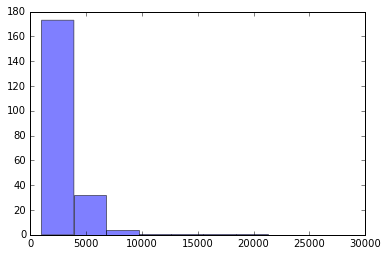

In [6]:
plt.hist(data.inten,alpha=0.5,cumulative=-1,range=(threshold,30000))

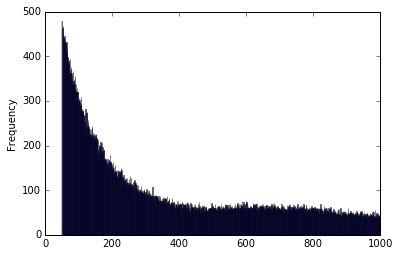

In [7]:
data.m_z.plot(kind='hist', alpha=0.5,bins=1000)

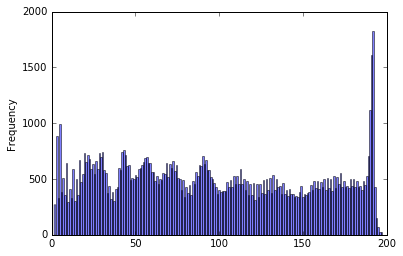

In [8]:
data.rt.plot(kind='hist', alpha=0.5,bins=200)

In [9]:
img=Image.new("F", (200,1000))

In [10]:
rt_step=(max(rt)-min(rt))/(200-1)
m_z_step=(max(m_z)-min(m_z))/(1000-1)

In [11]:
buffer = img.load()
filtered_peaks_list=[]
for peak in zip(rt,m_z,inten):
    if peak[2]>=threshold:
        buffer[int((peak[0]-min(rt))/rt_step),int((peak[1]-min(m_z))/m_z_step)]+=peak[2]
        filtered_peaks_list.append(peak)

In [12]:
### view image directly
# img.show()

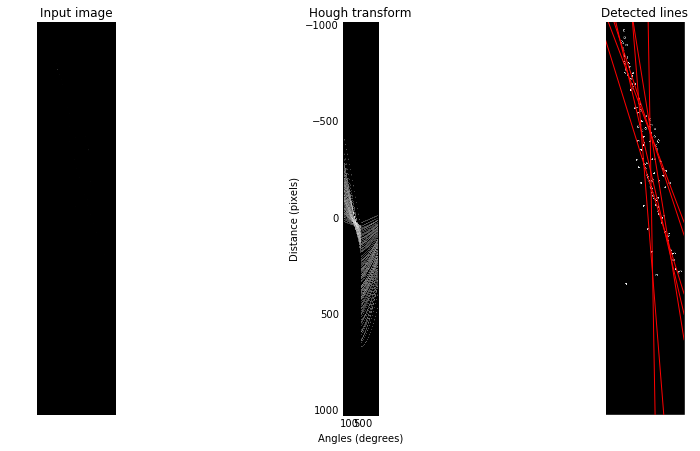

In [13]:
gray=np.array(img)
for i in range(1):
    #sci-kit image
    edges = canny(gray, 2, 1, 25)
    h, theta, d = hough_line(edges,theta=np.concatenate((np.linspace(-np.pi/4, 0, 90),np.linspace(np.pi/2, np.pi *3/4, 90))))
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))
    plt.tight_layout()
    # Generating figure 1.
    ax0.imshow(gray, cmap=cm.gray)
    ax0.set_title('Input image')
    ax0.set_axis_off()

    ax1.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
    ax1.set_title('Hough transform')
    ax1.set_xlabel('Angles (degrees)')
    ax1.set_ylabel('Distance (pixels)')
    ax1.axis('image')
    
    ax2.imshow(edges, cmap=cm.gray)
    row1, col1 = gray.shape
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d, min_distance=9, min_angle=5, threshold=0.4 * np.max(h),num_peaks=10)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
        ax2.plot((0, col1), (y0, y1), '-r')

    ax2.axis((0, col1, row1, 0))
    ax2.set_title('Detected lines')
    ax2.set_axis_off()
    

angle= -0.300039747815 m= 3.23227306864 d= 45.6986876149
(array([ 22,  22,  22, ..., 670, 670, 670]), array([44, 45, 46, ..., 50, 51, 52]))
angle= -0.220617461628 m= 4.4589538937 d= -125.728717933
(array([ 22,  22,  22, ..., 670, 670, 670]), array([44, 45, 46, ..., 50, 51, 52]))
angle= -0.361812637071 m= 2.64219140164 d= -18.3721391465
(array([ 40,  40,  40,  40,  40,  41,  41,  42,  42,  43,  43,  44,  44,
        44,  44,  44,  54,  54,  54,  54,  54,  55,  55,  56,  56,  57,
        57,  58,  58,  58,  58,  58,  66,  66,  66,  66,  66,  67,  67,
        68,  68,  69,  69,  70,  70,  70,  70,  70,  81,  81,  81,  81,
        81,  82,  82,  83,  83,  84,  84,  85,  85,  85,  86,  86,  87,
        87,  87,  88,  88,  89,  89,  89,  90,  90,  91,  91,  91,  91,
        91, 102, 102, 102, 103, 103, 103, 104, 105, 106, 106, 106, 106,
       106, 107, 107, 107, 108, 108, 109, 109, 110, 110, 110, 110, 110,
       122, 122, 122, 122, 122, 123, 123, 124, 124, 125, 125, 125, 126,
       126, 1

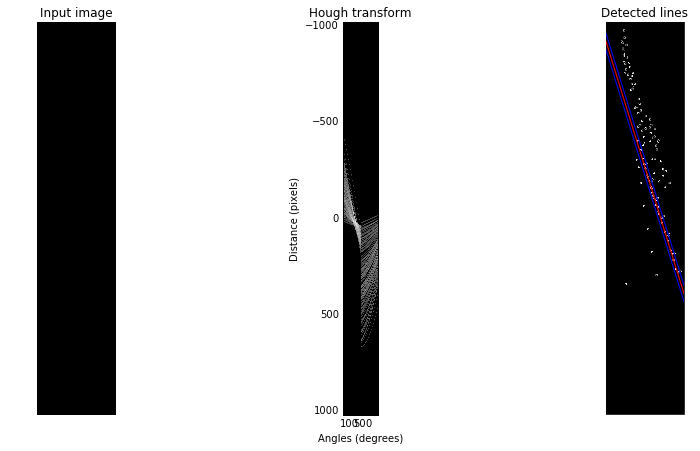

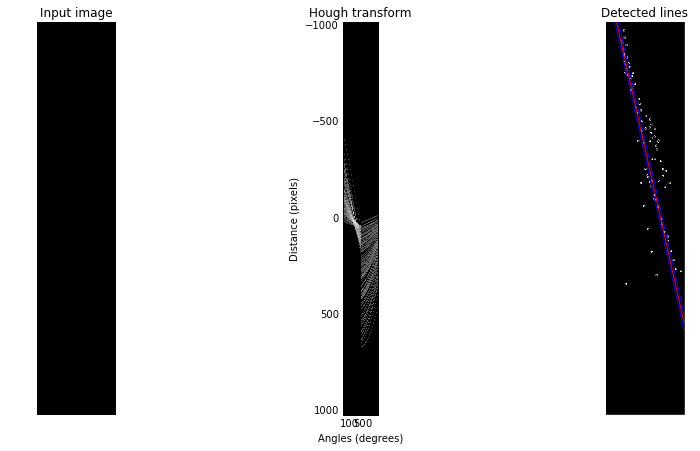

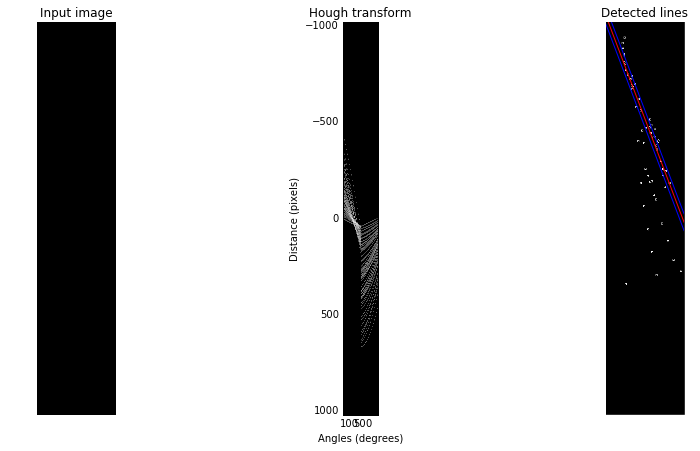

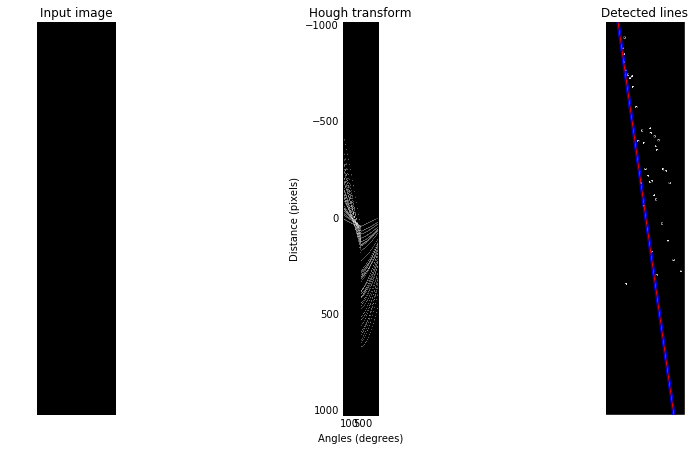

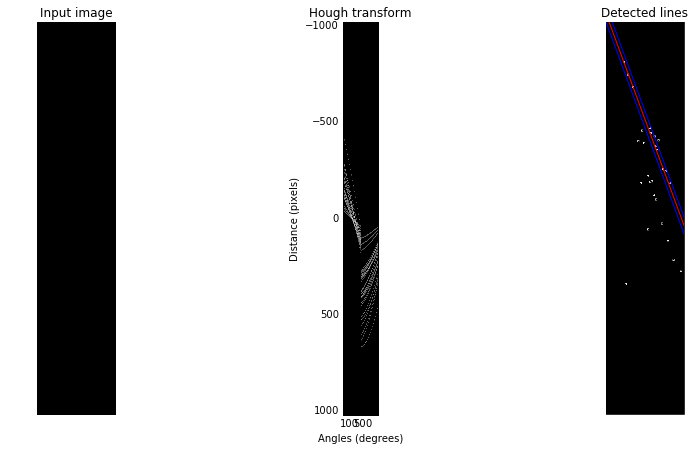

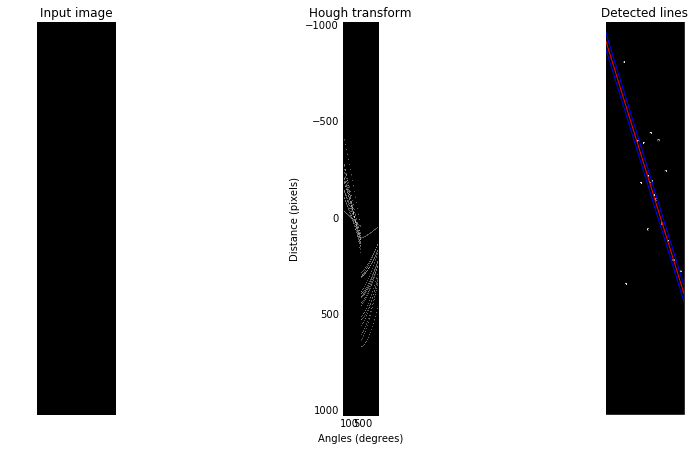

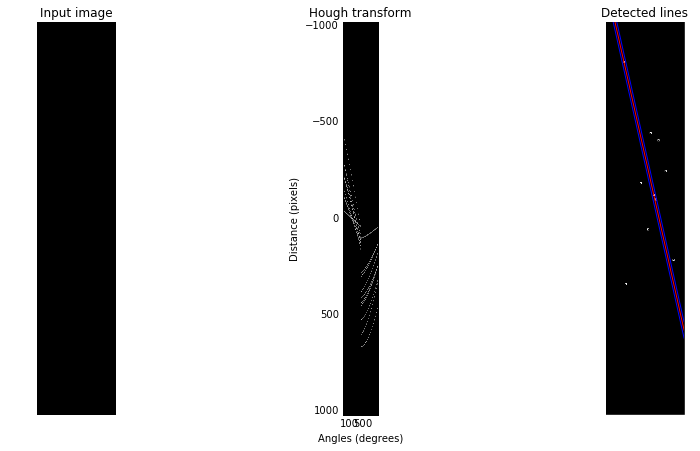

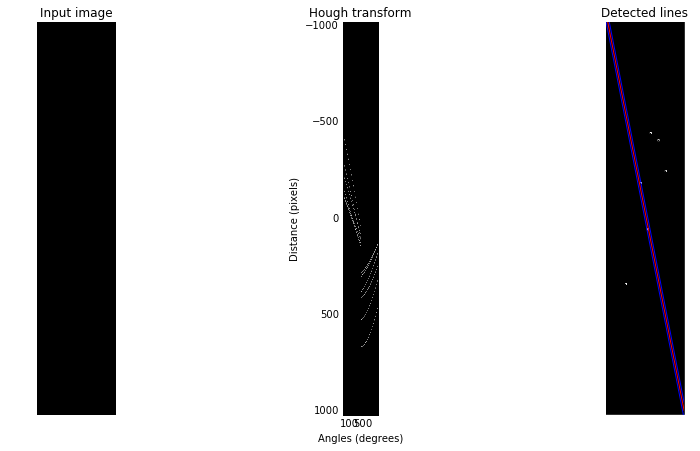

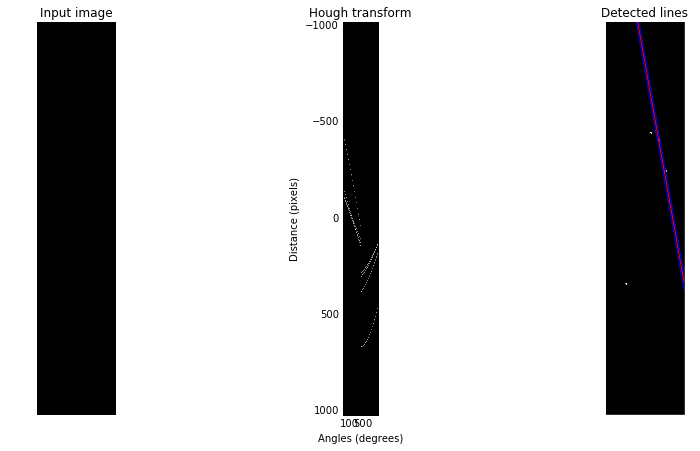

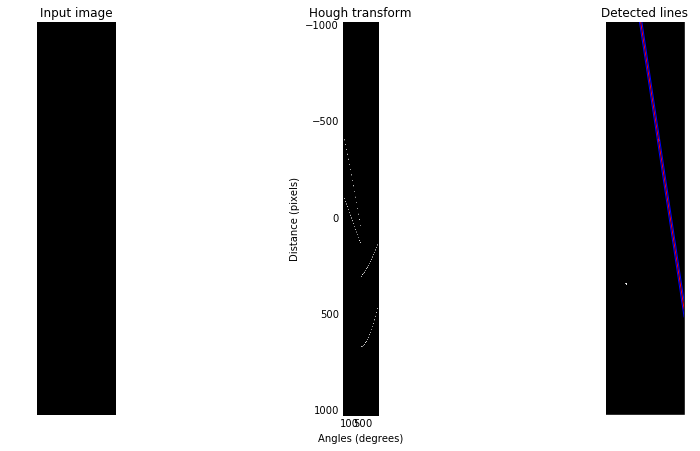

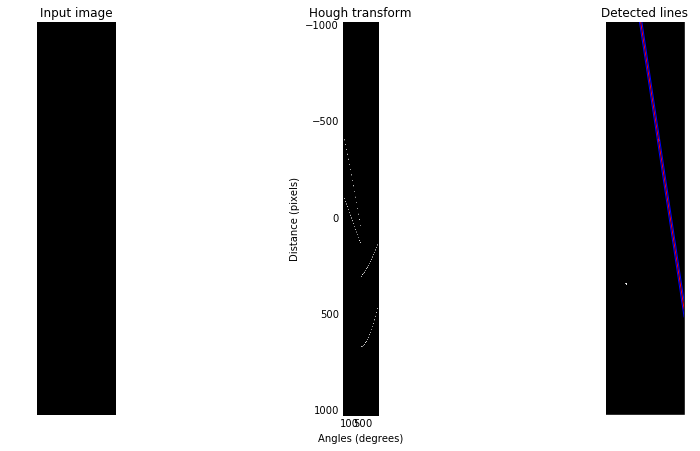

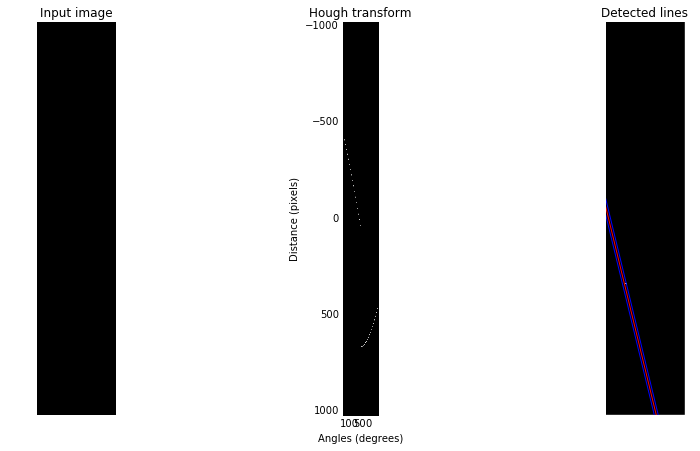

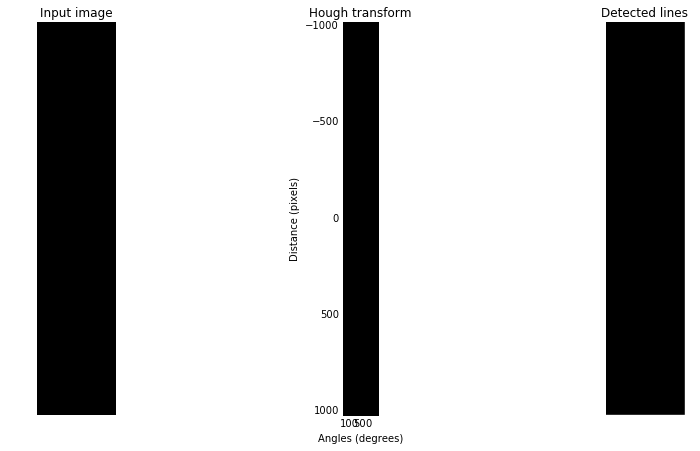

In [14]:
gray=np.array(img)
delta=20
extract_peaks_list=[]
for i in range(13):
    #sci-kit image
    edges = canny(gray, 2, 1, 25)
    h, theta, d = hough_line(edges,theta=np.concatenate((np.linspace(-np.pi/4, 0, 90),np.linspace(np.pi/2, np.pi *3/4, 90))))
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))
    plt.tight_layout()
    # Generating figure 1.
    ax0.imshow(gray, cmap=cm.gray)
    ax0.set_title('Input image')
    ax0.set_axis_off()

    ax1.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]),d[-1], d[0]], cmap=cm.gray, aspect=1/1.5)
    ax1.set_title('Hough transform')
    ax1.set_xlabel('Angles (degrees)')
    ax1.set_ylabel('Distance (pixels)')
    ax1.axis('image')
    
    ax2.imshow(edges, cmap=cm.gray)
    row1, col1 = gray.shape
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d, min_distance=9, min_angle=10, threshold=0.5 * np.max(h),num_peaks=1)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
        ax2.plot((0, col1), (y0, y1), '-r')
        m=(y0-y1)/(0-col1)
        print('angle=',angle,'m=',m,'d=',y0)
        ax2.plot((0, col1), (y0+delta/np.cos(angle), y1+delta/np.cos(angle)), '-b')
        ax2.plot((0, col1), (y0-delta/np.cos(angle), y1-delta/np.cos(angle)), '-b')
    ax2.axis((0, col1, row1, 0))
    ax2.set_title('Detected lines')
    ax2.set_axis_off()
    extract_peaks_list.append([])
    for peak in filtered_peaks_list:
        if abs( - m * int((peak[0]-min(rt))/rt_step) + int((peak[1]-min(m_z))/m_z_step) - y0 ) ** 2  <= (delta ** 2) * (m ** 2 + 1) :
            gray[int((peak[1]-min(m_z))/m_z_step),int((peak[0]-min(rt))/rt_step)]=0
            extract_peaks_list[-1].append(peak)
            filtered_peaks_list.remove(peak)
    print(np.nonzero(edges))